## The Data

### Handwritten Digit Recognition Dataset (MNIST)

We will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below).

## The Assignment

### Objectives

You will use TensorFlow to implement several neural network models (labelled Model 1-4).

You will then train these models to classify hand written digits from the Mnist dataset.

### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

    initializer = tf.contrib.layers.xavier_initializer()
    my_variable = tf.Variable(initializer(shape))

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.

*Note*: Sum the loss across the elements of the batch with tf.reduce_sum().

*Hint*: read about TensorFlow's [tf.nn.softmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits) function.

### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function.

Hint: read about TensorFlow's [tf.train.GradientDescentOptimizer()](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer).


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 

each time evaluate the accuracy of the model both on 20% of the **train** set and on the entire **test** set.

### Reporting

For each model i, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the and utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       (num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       (num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       (num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]

# Imports and utility functions 

In [0]:
# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# Global variables.
log_period_samples = 20000
batch_size = 100

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10])
  return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
  # Generate figure.
  fig, axes = plt.subplots(3, 4, figsize=(22,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  # Plot all learning curves.
  for i, results in enumerate(experiment_data):
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      # Plot.
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      # Prettify individual plots.
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Task {}'.format(i + 1))
      axes[j, i].legend()
  # Prettify overall figure.
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()

# Generate summary table of results.
def plot_summary_table(experiment_data):
  # Fill Data.
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('Model {}'.format(i + 1))
    cell_text.append([])
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      cell_text[i].append(test_accuracy[-1])
  # Generate Table.
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  # Prettify.
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

# Model 1 (20 pts)

### Model

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=5, *learning_rate*=0.1

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task1 = []
settings = [(5, 0.0001), (5, 0.005), (5, 0.1)]

In [0]:
print('Training Model 1')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:

  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()
  x, y_ = get_placeholders()
  mnist = get_data()
  eval_mnist = get_data()

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  initializer = tf.contrib.layers.xavier_initializer()
  w1 = tf.Variable(initializer([784,10]))
  b1 = tf.Variable(initializer([1,10]))
  out = tf.matmul(x,w1)+b1
  
  cross_entropy = tf.reduce_sum(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=out))
 
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
  
  correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(out, 1))
  correct_prediction = tf.cast(correct_prediction, tf.float32)
  accuracy = tf.reduce_mean(correct_prediction)
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      
      #################
      # Training step #
      #################
      sess.run(train_step,feed_dict={x: batch_xs, y_: batch_ys})
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        aux_train =  sess.run(accuracy,feed_dict = {x:mnist.train.images[0:11000,:],y_:mnist.train.labels[0:11000,:]})
        train_accuracy.append(aux_train)
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        aux_test = sess.run(accuracy, feed_dict = {x:mnist.test.images,y_:mnist.test.labels})
        test_accuracy.append(aux_test) 
        
  print(train_accuracy)
  print(test_accuracy)
  experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 1
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[0.75927275, 0.81627274, 0.83736366, 0.8503636, 0.857, 0.8641818, 0.8676364, 0.8700909, 0.87154543, 0.8732727, 0.8765454, 0.878, 0.87936366]
[0.7771, 0.8256, 0.8423, 0.8562, 0.8632, 0.8708, 0.8761, 0.8778, 0.8811, 0.884, 0.8858, 0.8866, 0.8889]
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting

In [0]:
print(experiments_task1)

[((5, 0.0001), [0.11309091, 0.12036364, 0.12754546, 0.13545455, 0.14345455, 0.15372728, 0.16818182, 0.18627273, 0.20736364, 0.22754546, 0.25190908, 0.27472728, 0.29581818], [0.1193, 0.1266, 0.1337, 0.1417, 0.152, 0.1633, 0.1795, 0.1963, 0.214, 0.2336, 0.2537, 0.2726, 0.2917]), ((5, 0.005), [0.64954543, 0.7560909, 0.79736364, 0.81363636, 0.8291818, 0.83772725, 0.8404545, 0.8468182, 0.8497273, 0.8530909, 0.8552727, 0.85554546, 0.85754544], [0.6495, 0.7644, 0.8017, 0.8209, 0.8375, 0.8439, 0.8477, 0.8535, 0.8581, 0.8631, 0.8664, 0.8681, 0.8715]), ((5, 0.1), [0.8733636, 0.88281816, 0.89436364, 0.8979091, 0.9004545, 0.9044545, 0.9054545, 0.9078182, 0.9070909, 0.90563637, 0.91063637, 0.915, 0.91654545], [0.878, 0.8924, 0.9011, 0.9037, 0.9097, 0.9096, 0.912, 0.9147, 0.9119, 0.9148, 0.9174, 0.9154, 0.9173])]


# Model 2 (20 pts)

1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]

In [0]:
print('Training Model 2')

# Train Model 2 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  initializer = tf.contrib.layers.xavier_initializer()
  w1 = tf.Variable(initializer([784,32]))
  b1 = tf.Variable(initializer([1,32]))
  h1 = tf.nn.relu(tf.matmul(x,w1)+b1) # We calc the hidden layer
  w2 = tf.Variable(initializer([32,10]))
  b2 = tf.Variable(initializer([1,10]))
  out = tf.matmul(h1,w2)+b2
  
  cross_entropy = tf.reduce_sum(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=out))
 
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
  
  correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(out, 1))
  correct_prediction = tf.cast(correct_prediction, tf.float32)
  accuracy = tf.reduce_mean(correct_prediction)
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run(train_step,feed_dict={x: batch_xs, y_: batch_ys})
      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        aux_train =  sess.run(accuracy,feed_dict = {x:mnist.train.images[0:11000,:],y_:mnist.train.labels[0:11000,:]})
        train_accuracy.append(aux_train)
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        aux_test = sess.run(accuracy, feed_dict = {x:mnist.test.images,y_:mnist.test.labels})
        test_accuracy.append(aux_test)
    
    
    experiments_task2.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[0.6513636, 0.8010909, 0.83754545, 0.8553636, 0.86727273, 0.87627274, 0.8823636, 0.886, 0.8870909, 0.89172727, 0.8922727, 0.89927274, 0.89945453, 0.8979091, 0.90009093, 0.9013636, 0.9071818, 0.90818185, 0.91054547, 0.9097273, 0.91, 0.91136366, 0.912, 0.9127273, 0.911, 0.91236365, 0.91145456, 0.91745454, 0.91663635, 0.9191818, 0.91836363, 0.9184545, 0.92036366, 0.92036366, 0.92127275, 0.922, 0.9226364, 0.924, 0.9237273, 0.92318183, 0.925]
[0.6589, 0.8094, 0.8448, 0.8624, 0.8749, 0.8824, 0.8892, 0.8923, 0.8955, 0.8993, 0.9013, 0.9028, 0.9056, 0.9055, 0.9078, 0.9088, 0.9102, 0.9112, 0.9118, 

In [0]:
print(experiments_task2)

[((15, 0.0001), [0.072909094, 0.078090906, 0.08736364, 0.09318182, 0.09890909, 0.107363634, 0.11436363, 0.12081818, 0.12109091, 0.12727273, 0.13409092, 0.14781818, 0.155, 0.16727273, 0.17863636, 0.19072728, 0.2, 0.21209091, 0.2240909, 0.23872727, 0.2520909, 0.26436365, 0.26845455, 0.2789091, 0.30354545, 0.318, 0.33036363, 0.33672726, 0.34963638, 0.36254546, 0.37427273, 0.386, 0.39863637, 0.40672728, 0.41718182, 0.43072727, 0.44063637, 0.45327273, 0.46081817, 0.46754545, 0.47763637], [0.0728, 0.0795, 0.0863, 0.0932, 0.0996, 0.105, 0.1108, 0.1183, 0.1259, 0.1349, 0.1406, 0.1488, 0.1599, 0.1695, 0.1799, 0.1893, 0.2005, 0.2126, 0.2267, 0.2392, 0.251, 0.2629, 0.2791, 0.2922, 0.3061, 0.3177, 0.3325, 0.3476, 0.3598, 0.3713, 0.3817, 0.3954, 0.4083, 0.419, 0.4281, 0.4376, 0.4489, 0.46, 0.4701, 0.4781, 0.4859]), ((15, 0.005), [0.49672726, 0.6926364, 0.7600909, 0.7928182, 0.81436366, 0.83418185, 0.84418184, 0.85318184, 0.8587273, 0.8637273, 0.86972725, 0.8758182, 0.87954545, 0.8814545, 0.88436365

# Model 3 (20 pts)

2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.05

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task3 = []
settings = [(5, 0.003), (40, 0.003), (40, 0.05)]

In [0]:
print('Training Model 3')

# Train Model 3 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  initializer = tf.contrib.layers.xavier_initializer()
  w1 = tf.Variable(initializer([784,32]))
  b1 = tf.Variable(initializer([1,32]))
  h1 = tf.nn.relu(tf.matmul(x,w1)+b1) # We calc the first hidden layer
  w2 = tf.Variable(initializer([32,32]))
  b2 = tf.Variable(initializer([1,32]))
  h2 = tf.nn.relu(tf.matmul(h1,w2)+b2) # We calc the second hidden layer
  w3 = tf.Variable(initializer([32,10]))
  b3 = tf.Variable(initializer([1,10]))
  out = tf.matmul(h2,w3)+b3
  
  cross_entropy = tf.reduce_sum(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=out))
 
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
  
  correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(out, 1))
  correct_prediction = tf.cast(correct_prediction, tf.float32)
  accuracy = tf.reduce_mean(correct_prediction)
  
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run(train_step,feed_dict={x: batch_xs, y_: batch_ys})
      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        aux_train =  sess.run(accuracy,feed_dict = {x:mnist.train.images[0:11000,:],y_:mnist.train.labels[0:11000,:]})
        train_accuracy.append(aux_train)
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        aux_test = sess.run(accuracy, feed_dict = {x:mnist.test.images,y_:mnist.test.labels})
        test_accuracy.append(aux_test)
        
    experiments_task3.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MN

In [0]:
print(experiments_task3)

[((5, 0.003), [0.23836364, 0.41045454, 0.5377273, 0.634, 0.6966364, 0.734, 0.7612727, 0.77918184, 0.7889091, 0.80472726, 0.81627274, 0.8322727, 0.8395454], [0.2401, 0.4005, 0.5256, 0.6197, 0.6907, 0.7379, 0.7691, 0.7909, 0.8047, 0.8181, 0.8298, 0.8397, 0.8476]), ((40, 0.003), [0.19118182, 0.31072727, 0.52745456, 0.6381818, 0.68872726, 0.72981817, 0.76354545, 0.7845455, 0.8, 0.8165454, 0.8271818, 0.83336365, 0.84181815, 0.85663635, 0.8649091, 0.86863637, 0.87027276, 0.87527275, 0.878, 0.87472725, 0.8758182, 0.87854546, 0.88436365, 0.8856364, 0.8899091, 0.8906364, 0.89254546, 0.8914545, 0.893, 0.89418185, 0.8961818, 0.89527273, 0.89763635, 0.8980909, 0.89863634, 0.9031818, 0.9031818, 0.9045454, 0.90172726, 0.90154546, 0.90090907, 0.9094545, 0.9093636, 0.9097273, 0.9093636, 0.9100909, 0.9062727, 0.906, 0.9068182, 0.9109091, 0.9110909, 0.9121818, 0.9048182, 0.90581816, 0.9051818, 0.91490906, 0.91636366, 0.915, 0.9150909, 0.91545457, 0.9162727, 0.91545457, 0.9161818, 0.91836363, 0.9191818, 

# Model 4 (20 pts)

### Model
3 layer convolutional model (2 convolutional layers followed by max pooling) + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- Employ plain convolution (no stride) and for max pooling operations use 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- num_epochs=5, learning_rate=0.01

- num_epochs=10, learning_rate=0.001

- num_epochs=20, learning_rate=0.001 


In [0]:
# CAREFUL: Running this CL resets the experiments_task4 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task4 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

In [0]:
print('Training Model 4')

# Train Model 4 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  x_image = tf.reshape(x, [-1, 28, 28, 1])
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  initializer = tf.contrib.layers.xavier_initializer()
  w_conv1 = tf.Variable(initializer([3,3,1,8]))
  b_conv1 = tf.Variable(initializer([8]))
  
  conv1 =  tf.nn.conv2d(x_image, w_conv1, [1, 1, 1, 1], padding='SAME') + b_conv1
  max1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
  
  w_conv2 = tf.Variable(initializer([3,3,8,8]))
  b_conv2 = tf.Variable(initializer([8]))
  
  conv2 = tf.nn.conv2d(max1, w_conv2, [1, 1, 1, 1], padding='SAME') + b_conv2
  max2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
  
  flat_out = tf.reshape(max2, [-1, 7 * 7 * 8])
  
  w_h1 =  tf.Variable(initializer([7*7*8,32]))
  b_h1 =  tf.Variable(initializer([1,32]))
  
  h1 = tf.nn.relu(tf.matmul(flat_out,w_h1)+b_h1)
  
  w_out = tf.Variable(initializer([32,10]))
  b_out =  tf.Variable(initializer([1,10]))
  out = tf.matmul(h1,w_out)+b_out
        
  cross_entropy = tf.reduce_sum(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=out))
 
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
  
  correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(out, 1))
  correct_prediction = tf.cast(correct_prediction, tf.float32)
  accuracy = tf.reduce_mean(correct_prediction)
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run(train_step,feed_dict={x: batch_xs, y_: batch_ys})
      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        aux_train =  sess.run(accuracy,feed_dict = {x:mnist.train.images[0:11000,:],y_:mnist.train.labels[0:11000,:]})
        train_accuracy.append(aux_train)
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        aux_test = sess.run(accuracy, feed_dict = {x:mnist.test.images,y_:mnist.test.labels})
        test_accuracy.append(aux_test)
        
    experiments_task4.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 4
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MN

In [0]:
print(experiments_task4)

[((5, 0.01), [0.096454546, 0.10481818, 0.10118182, 0.10018182, 0.09790909, 0.09972727, 0.09972727, 0.09536364, 0.11090909, 0.10336363, 0.11090909, 0.10245454, 0.10027273], [0.1009, 0.1028, 0.1009, 0.101, 0.1032, 0.1032, 0.1032, 0.0982, 0.1135, 0.1032, 0.1135, 0.1009, 0.1028]), ((10, 0.001), [0.9143636, 0.939, 0.96163636, 0.96772724, 0.9728182, 0.9737273, 0.97727275, 0.9728182, 0.9787273, 0.9787273, 0.98245454, 0.98309094, 0.9826364, 0.98654544, 0.9759091, 0.9839091, 0.9900909, 0.9878182, 0.98572725, 0.9900909, 0.9868182, 0.989, 0.989, 0.9870909, 0.992, 0.9909091, 0.9899091], [0.9218, 0.9443, 0.9587, 0.9668, 0.9714, 0.9695, 0.9725, 0.9757, 0.9755, 0.9739, 0.9803, 0.9776, 0.9801, 0.9818, 0.9711, 0.9823, 0.9805, 0.9807, 0.9818, 0.9834, 0.9838, 0.9838, 0.9838, 0.9844, 0.9841, 0.9852, 0.9853]), ((20, 0.001), [0.9, 0.945, 0.9604545, 0.96654546, 0.96763635, 0.97763634, 0.97736365, 0.975, 0.979, 0.9793636, 0.9791818, 0.97818184, 0.9837273, 0.98754543, 0.98572725, 0.9837273, 0.9890909, 0.987181

# Results

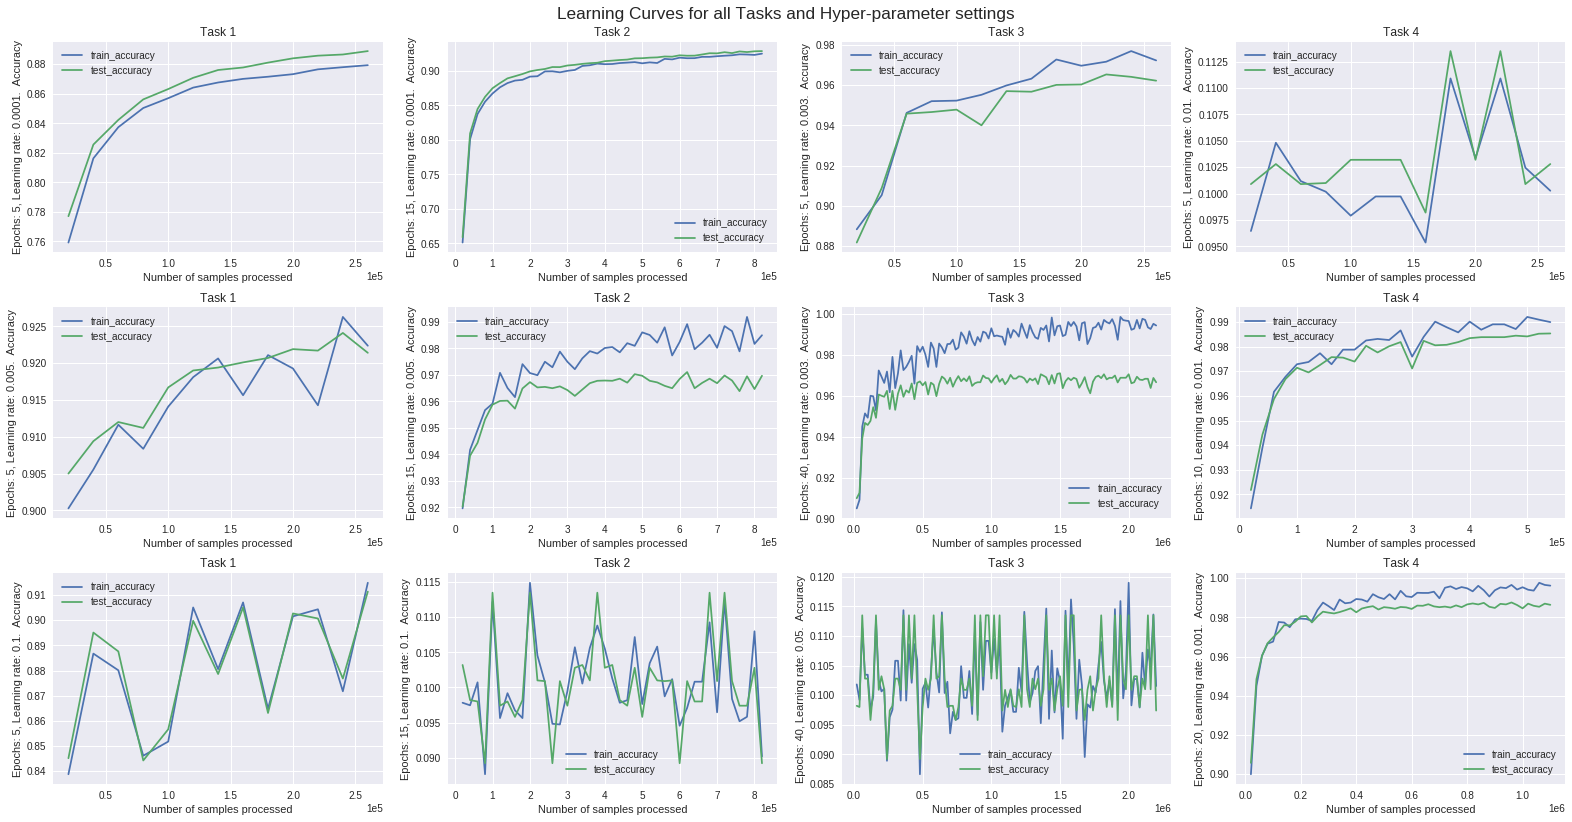

In [0]:
plot_learning_curves([experiments_task1, experiments_task2, experiments_task3, experiments_task4])
#plot_learning_curves([experiments_task1, experiments_task2, experiments_task3])

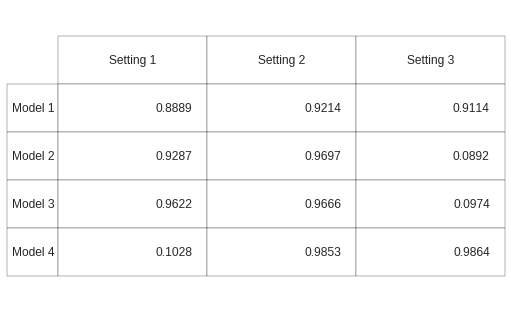

In [0]:
plot_summary_table([experiments_task1, experiments_task2, experiments_task3, experiments_task4])
#plot_summary_table([experiments_task1, experiments_task2, experiments_task3])